
Areebah Anzar



## 1. Integration with Simpson's rule

Write a function to perform integration using **Simpson's rule**. The input parameters to the integrator function should be:
* A function, $f$
* Two real numbers giving the limits of integration
* The number of subdivisions $N$ to use for estimating the integral



### 1.a. Write the integration function

Fill in the function outline below. If you're having trouble getting started, try writing out all the individual computations that need to be performed to estimate the integral. Then, code each one of them individually.

In [15]:
def integrate(function_name, lower_limit, upper_limit, N_div):
    """
    Integrate the input univariate function, function_name, 
    between lower_limit and upper_limit using Simpson's rule 
    and return the result. The integral bounds will be 
    subdivided into N_div divisions to estimate the integral.
    """
    
    # get rid of odd numbers:
    if N_div % 2 ==1:
        N_div+=1
        
    #spacing between points
    dx = (upper_limit - lower_limit)/N_div
    
    #create total value and initialize to zero
    total = 0
    
    #create for loop to sum values
    
    for i in range(N_div):
        #only going to sum over even intergers to prevent overlapping
        if i%2 == 0:
            continue
        total += (dx/3)*(function_name(lower_limit+(i-1)*dx) + 4*function_name(lower_limit + i * dx) 
                         + function_name(lower_limit+(i+1)*dx))
        
    
    
    return total # Return the result here

### 1.b. Test the function

Test your function in the cell below.

In [16]:
def test_quad(x):
    return 3*x**2

integrate(test_quad, 0, 1, 100)

1.0

Compare your output with the analytical result here. Does it perform as expected?

In [ ]:
#the output compared to the analytical result it the same which means it performed correctly because the integral of 3x^2 from 0 to 1 is 1 and that is the result the function got. 

## 2. Application: diffraction patterns generated by a circular aperture


When light with wavelength $\lambda$ passes through a circular aperture, as in a telescope, it doesn't produce just a single point of light in the focal plane. Rather, the light is *diffracted*, producing a central bright spot surrounded by alternating bright and dark rings. Mathematically, the intensity of the focused light is given by

$$I(r) = \frac{J_1(kr)}{kr}^2\,,$$

where $r$ is the distance from the center of the focal plane, $k = 2\pi/\lambda$, and $J_1$ is the order 1 [Bessel function](https://en.wikipedia.org/wiki/Bessel_function) of the first kind. For more information, follow the Wikipedia link. Bessel functions appear very frequently in physics.

One way to define the Bessel functions $J_m$ is through an integral,

$$ J_m(x) = \frac{1}{\pi}\int_0^\pi\!d\theta\; \cos(m\theta - x \sin \theta) \, $$ 

where $m$ is a nonnegative integer and $x\geq 0$. 

In the rest of the exercise below, we'll write a function to evaluate the Bessel function using our integrator defined in part 1. Then we'll test it and plot the results.

### 2.a. Write the Bessel function

Write your own version of the Bessel function by filling in the cell below. We'll assume that the number of divisions is 1000.

In [51]:
def J(m, x):
    """
    mth Bessel function of the first kind evaluated at real number x,  
    calculated using an integral representation with Simpson's rule and 1000 divisions.
    """
    import numpy as np
    
        # You might want to define a local function for the integrand
    def integrand(theta):
        return np.cos(m*theta-x*np.sin(theta))  # Return the integrand here
    
    # Fill in your code here, using the integrate function you defined in part 1
    
    # write the function 

    #--------- integration function ----- 
    def integrate(function_name, lower_limit, upper_limit, N_div):
    # get rid of odd numbers:
        if N_div % 2 ==1:
            N_div+=1     
    #spacing between points
        dx = (upper_limit - lower_limit)/N_div
    #create total value and initialize to zero
        total = 0
    #create for loop to sum values
        for i in range(N_div):
        #only going to sum over even intergers to prevent overlapping
            if i%2 == 0:
                continue
            total += (dx/3)*(function_name(lower_limit+(i-1)*dx) + 4*function_name(lower_limit + i * dx) 
                            + function_name(lower_limit+(i+1)*dx))
        return total # Return the result here
    #--------end of integration function---------
    # Remember: you'll need to evaluate sine and cosine functions, and to use the constant pi
    # You can access these functions from numpy or the Python math library
    return (1/np.pi) *(integrate(integrand, 0, np.pi,1000)) 

### 2.b. Test the function

Now, test your function in the cell below.

In [52]:
print(J(1,1))

0.4400505857449339


How does this compare with the expected result? Let's check our answer against the builtin Bessel function evaluator in `scipy`.

In [55]:
import scipy.special as sp

print(J(1,1) - sp.jv(1, 1))

3.3306690738754696e-16


### 2.c. Plot the Bessel function(s)

Now, let's use our function `J(m, x)` to plot three different Bessel functions, $J_0(x)$, $J_1(x)$ and $J_2(x)$. Your job is to fill in the following code to produce these plots. The outline below uses `seaborn`, but you're also welcome to use `matplotlib` directly if you'd like.

*Hint*$^2$: Your function for evaluating the Bessel functions might take a little bit of time. You can potentially make it faster, and easier to use, with the `numpy.vectorize` function. For more information, look [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.vectorize.html). If you vectorize `J(m, x)` then it will be able to operate on entire numpy arrays at once.

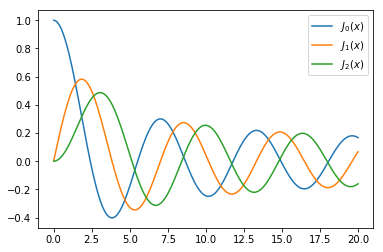

In [60]:
import seaborn as sns
import numpy as np

# x sample points
x = np.linspace(0, 20, 200)

y0 = J(0,x)
y1 = J(1,x)
y2 = J(2,x)

sns.lineplot(x, 
             y0,
             label='$J_0(x)$')

sns.lineplot(x, 
             y1,
             label='$J_1(x)$')

sns.lineplot(x, 
             y2,
             label='$J_2(x)$')